<a href="https://colab.research.google.com/github/Rafal-juru/previs-o_temporal_C19/blob/main/previs%C3%A3o_pandemia_pesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

#Criando Parâmetros

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
#df = pd.read_csv('brazil_cases.csv')
df = df[df['state'] == 'SP']
df = df.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})#renomeando colunas
df.head()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d') # formatando data para: ano - mes - dia
df.index = df['data'] #transformando data em indice
df_save = df #salvando data frame antes de modificar
df = df[0:300] #pegando apenas os primeiros 300 dias
df.tail()

,epi_week,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
data,,,,,,,,,,,,,,,,,,,,,
2020-12-16,51,2020-12-16,Brazil,SP,TOTAL,0,44282,0,1341428,44282,...,6336829.0,13800.00052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,51,2020-12-17,Brazil,SP,TOTAL,399,44681,20303,1361731,44681,...,6336829.0,13800.00052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-18,51,2020-12-18,Brazil,SP,TOTAL,197,44878,9922,1371653,44878,...,6336829.0,13800.00052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19,51,2020-12-19,Brazil,SP,TOTAL,151,45029,12447,1384100,45029,...,6336829.0,13800.00052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20,52,2020-12-20,Brazil,SP,TOTAL,0,45029,0,1384100,45029,...,6336829.0,13800.00052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = df['ObitosDiarios'] #y é a variavel que armazena os novos obitos agora

In [ ]:
import itertools
p = d = q = range(0,2) #variam num range de 0 a 1
pdq = list(itertools.product(p,d,q)) # cria lista com todas combinações de parametros possiveis
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]  #7 para pegar a sazonalidade
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

^ observe que temos uma boa combinação de parámetros sazonais

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

^lista com todas combinações de parametros possiveis

In [ ]:
print ('SARIMAX: {} x {}'.format (pdq[1], seasonal_pdq[2])) #print apenas para acompanhar oque esta acontecendo

SARIMAX: (0, 0, 1) x (0, 1, 0, 7)


#Arima

In [ ]:
import statsmodels.api as sm
aic_lista = []
for param in pdq: # parte não sazonal
    for param_seasonal in seasonal_pdq:  #lista de tuplas sazonais
        mod = sm.tsa.statespace.SARIMAX(y, #serie temporal
                                       order=param, # ordem NS
                                       seasonal_order=param_seasonal) # ordem SN
        resultados = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, resultados.aic)) # salvando informações para ver qual é a melhro combinação

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4017.1944378824282',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3759.9849845635295',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3285.0200137893753',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3234.8580077621527',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3368.809788089193',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3323.050919501602',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3238.5985903034953',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3234.314289996525',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3840.1363160919395',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3666.397053350249',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3286.3636014079852',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3236.5104088677354',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3370.769998174571',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3324.2274661744486',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3240.5002395294364',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3236.154529403907',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3712.2554406569598',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3610.951122060177',

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


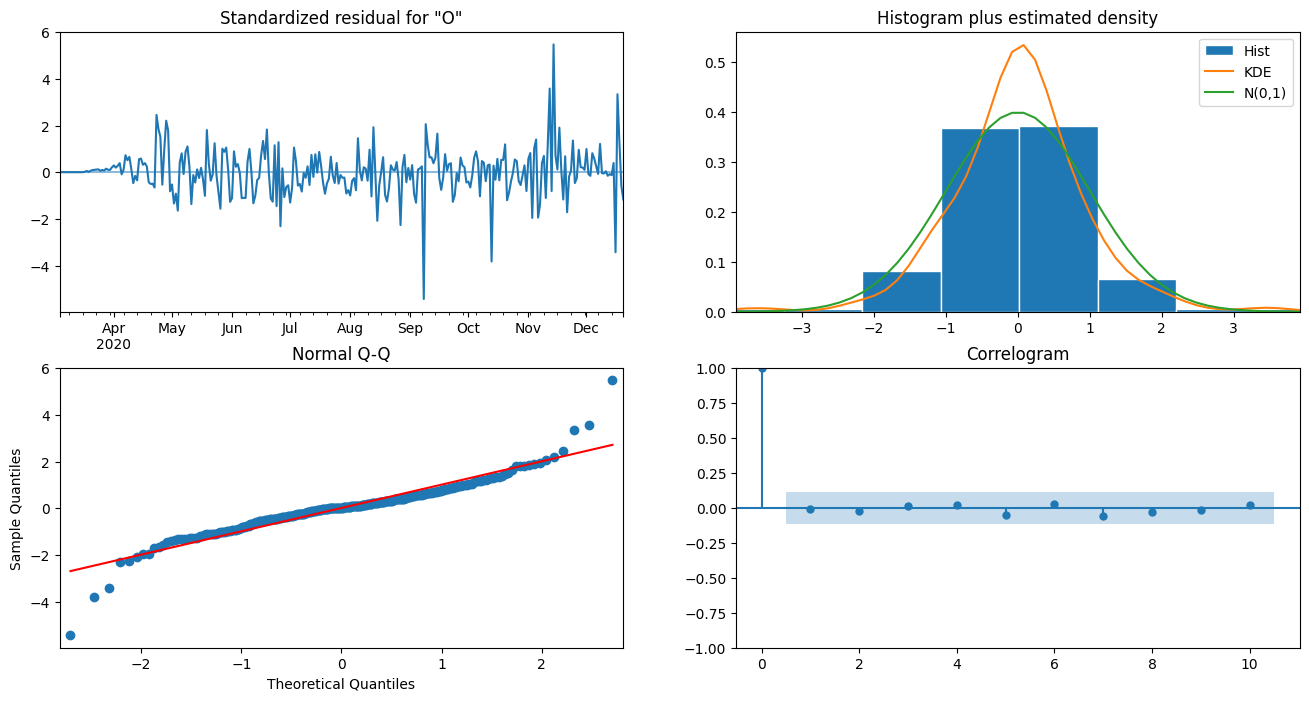

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y, #serie temporalxtzfiat mo
                                order=(1,1,1), seasonal_order = (0,1,1,7))  #combinação com menor AIC
resultados = mod.fit()
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

graf 1- aumento dos residos conforme o aumento dos obitos

graf 2- no histograma queremos que o kde se aproxime de N pois isso significa que os residuos estão normalmente destribuidos. Que não é o caso da nossa série atual pois nossa série é muito crescente, porem não tem muitos desvios e deformidades, logo é rasuavel.

graf 3- Q-Q (comparações entre quantis), quanto mais proximo nosso modelo esta dos nossos dados mais os montinhos estarão sobre a linha.

graf 4- correlograma onde temos as autocorrelações e como aponta no grafico, ela esta abaixo do 0,25 assim nosso modelo transformou a serie em algo estacionario antes de fazer as previzoes

#Previsão Obitos

In [ ]:
pred = resultados.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)#testando treinamento
pred_ic = pred.conf_int() #intervalo de coniança
pred_ic

,lower ObitosDiarios,upper ObitosDiarios
2020-07-01,230.473798,448.546591
2020-07-02,249.908242,467.981032
2020-07-03,175.208110,393.280898
2020-07-04,166.781707,384.854493
2020-07-05,4.803993,222.876777
...,...,...
2020-12-16,81.804619,299.877394
2020-12-17,104.226364,322.299139
2020-12-18,16.470363,234.543138
2020-12-19,74.726874,292.799649


Como esses dados também foram usados para o fit é de se esperar que tenhamos de fato um erro muito pequeno, por isso nosso intervalo de confiança também está bem pequeno. Quando formos fazer essa previsão para dados que não temos, ou seja, para dados do futuro, aí é de se esperar que esse intervalo de confiança aumente também.

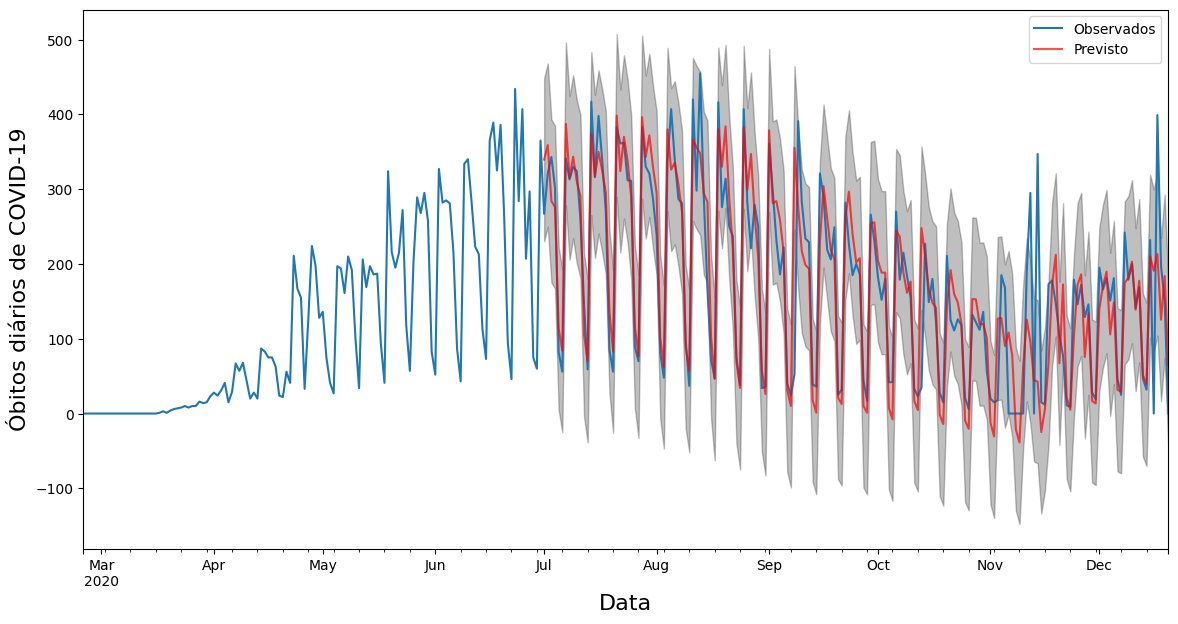

In [ ]:
ax = y['2020':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize=(14,7)) #media movel da previsão
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.25) #preenchendo intervalo de confiança
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19',fontsize=16)
plt.show()

pred_ic.iloc[:0,] e pred_ic.iloc[,:1] faz a linha "cinza/trasparente" que representa o intervalo de confiança

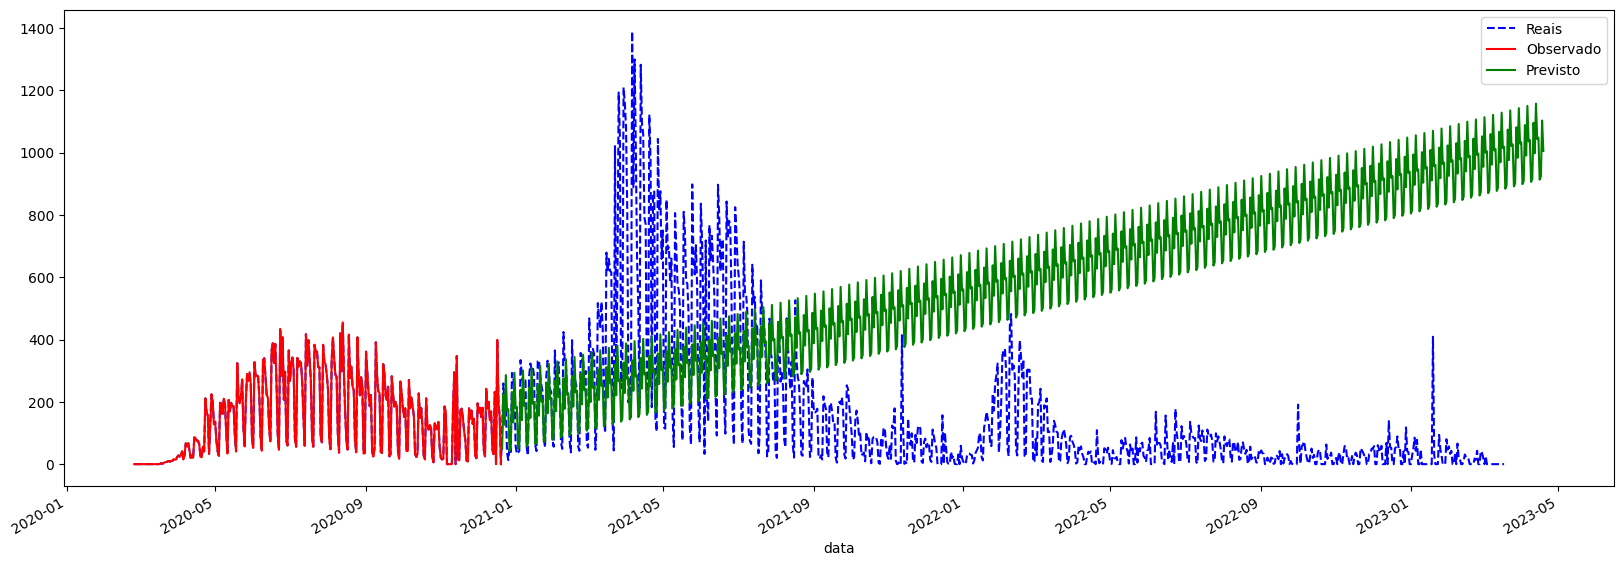

In [ ]:
pred_uc = resultados.get_forecast(steps = 850) #variavel para dados que a gente não tem, steps = dias (25 no caso)
x = df_save['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(x,linestyle='--',color='b',label='Reais')
ax = y.plot(label='Observado', color='red')
pred_uc.predicted_mean.plot(ax=ax, color='green', label='Previsto')
#ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1],color='k',alpha=0.25)
plt.legend()

Text(0, 0.5, 'Óbitos diários de COVID-19')

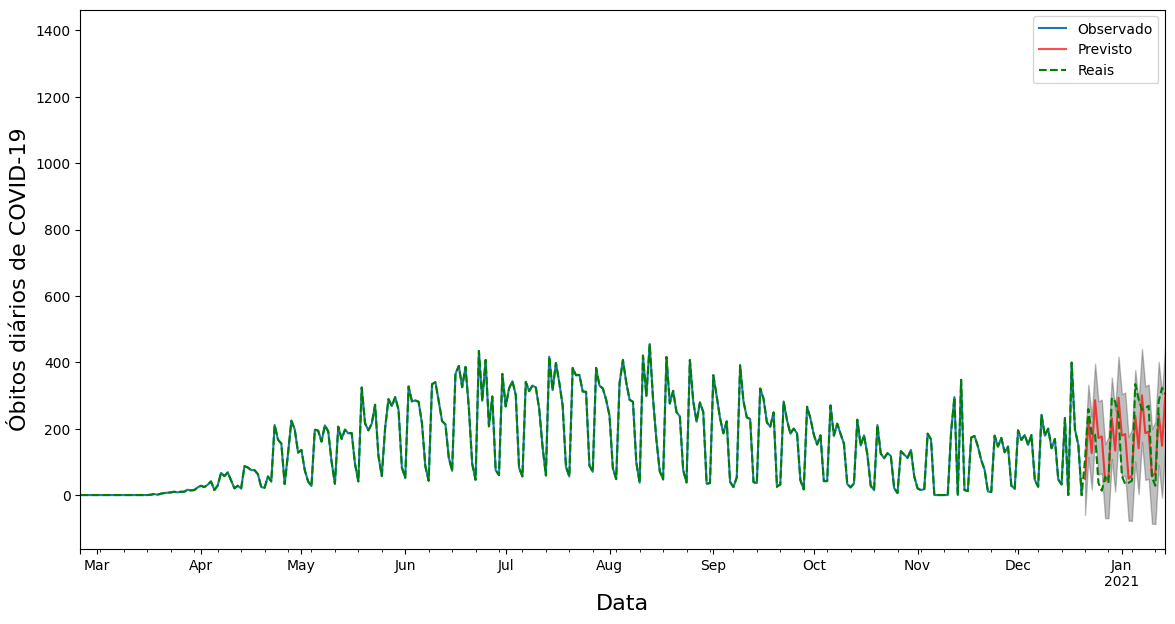

In [ ]:
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19',fontsize=16)